In [74]:
import pandas as pd
import numpy as np

import requests

from bs4 import BeautifulSoup

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud
import string
import re

from nltk.corpus import stopwords

import contractions

import nltk
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize, sent_tokenize

from textblob import TextBlob

from collections import Counter


from nltk.util import ngrams

from nrclex import NRCLex

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

from nltk.corpus import cmudict

import syllables

import spacy


In [2]:
df = pd.read_excel('Input.xlsx')

In [3]:
# Create an empty DataFrame to store the extracted data
output = pd.DataFrame(columns=['URL_ID', 'Title', 'Text'])

In [4]:
# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Extract information from the row
    url_id = row['URL_ID']
    article_url = row['URL']

    try:
        # Fetch the article content from the URL
        response = requests.get(article_url)
        response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)

        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract article title based on the HTML structure
        article_title = soup.find('h1').get_text(strip=True)

        # Extract article content based on the specific HTML structure
        article_content = soup.find('div', class_='td-post-content')

        if article_content:
            # Initialize a string to store the text
            extracted_text = ""

            # Extract the text content from paragraphs, list items, and underlined text
            for tag in article_content.find_all(['p', 'li']):
                if tag.name == 'p':
                    extracted_text += f"{tag.get_text()}\n"
                elif tag.name == 'li':
                    extracted_text += f"- {tag.get_text()}\n"

                # Check if the line contains the word 'Blackcoffer'
                if 'Blackcoffer' in tag.get_text():
                    break

            # Assign values directly to DataFrame using loc
            output.loc[index] = [url_id, article_title, extracted_text]

        # Print a message indicating failed extraction
        else:
            print(f"Article content not found on the page for URL_ID {url_id}")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching content from URL_ID {url_id}: {e}")
        continue  # Continue with the next iteration if there is an error

Error fetching content from URL_ID blackassign0036: 404 Client Error: Not Found for url: https://insights.blackcoffer.com/how-neural-networks-can-be-applied-in-various-areas-in-the-future/
Error fetching content from URL_ID blackassign0049: 404 Client Error: Not Found for url: https://insights.blackcoffer.com/covid-19-environmental-impact-for-the-future/


In [5]:
# Save the extracted data to a CSV file
output.to_excel('Output Data Structure.xlsx', index=False)

In [6]:
output.head()

,URL_ID,Title,Text
0,blackassign0001,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...
1,blackassign0002,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu..."
2,blackassign0003,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...
3,blackassign0004,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq..."
4,blackassign0005,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...


In [7]:
output.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL_ID  98 non-null     object
 1   Title   98 non-null     object
 2   Text    98 non-null     object
dtypes: object(3)
memory usage: 3.1+ KB


In [8]:
output.describe()

,URL_ID,Title,Text
count,98,98,98
unique,98,92,97
top,blackassign0001,Rise of telemedicine and its Impact on Livelih...,"“More gains on quality, affordability and acce..."
freq,1,3,2


In [9]:
# Creating a dataframe of Duplicate tweets
output_dup = output[output['Title'].duplicated()]
print("Total duplicates :",output_dup.shape)
output_dup

Total duplicates : (6, 3)


,URL_ID,Title,Text
9,blackassign0010,Rise of Cybercrime and its Effect by the Year ...,Understanding Cybercrime: An Overview\nIn the ...
13,blackassign0014,Rise of e-health and its impact on humans by t...,2020 was the year the world was ravaged by the...
14,blackassign0015,Rise of telemedicine and its Impact on Livelih...,"“More gains on quality, affordability and acce..."
15,blackassign0016,Rise of telemedicine and its Impact on Livelih...,"“More gains on quality, affordability and acce..."
17,blackassign0018,Rise of e-health and its impact on humans by t...,Introduction\nThe phrase “e-health” refers to ...
91,blackassign0092,Estimating the impact of COVID-19 on the world...,\n\nWill COVID19 END Globalization?\nGlobaliza...


blackassign0015 and blackassign0016 are same, hence dropping blackassign0016

In [10]:
output1 = output.drop(15).reset_index(drop=True)
output1.iloc[11:20]

,URL_ID,Title,Text
11,blackassign0012,Rise of telemedicine and its Impact on Livelih...,"Telemedicine, the use of technology to diagnos..."
12,blackassign0013,Rise of e-health and its impact on humans by t...,"The rise of e-health, or the use of electronic..."
13,blackassign0014,Rise of e-health and its impact on humans by t...,2020 was the year the world was ravaged by the...
14,blackassign0015,Rise of telemedicine and its Impact on Livelih...,"“More gains on quality, affordability and acce..."
15,blackassign0017,Rise of Chatbots and its impact on customer su...,The human race is known to come up with invent...
16,blackassign0018,Rise of e-health and its impact on humans by t...,Introduction\nThe phrase “e-health” refers to ...
17,blackassign0019,How does marketing influence businesses and co...,Marketing can be defined as an act of promotio...
18,blackassign0020,How advertisement increase your market value?,- Advertising allows companies to differentiat...
19,blackassign0021,Negative effects of marketing on society,"“Society can exist without Marketing, but Mark..."


In [11]:
output1.describe()

,URL_ID,Title,Text
count,97,97,97
unique,97,92,97
top,blackassign0001,Rise of e-health and its impact on humans by t...,We have seen a huge development and dependence...
freq,1,3,1


It can be observed that Text data is Unique irrespective of the title, hence proceeding with the cleaning process and than checking for duplicates

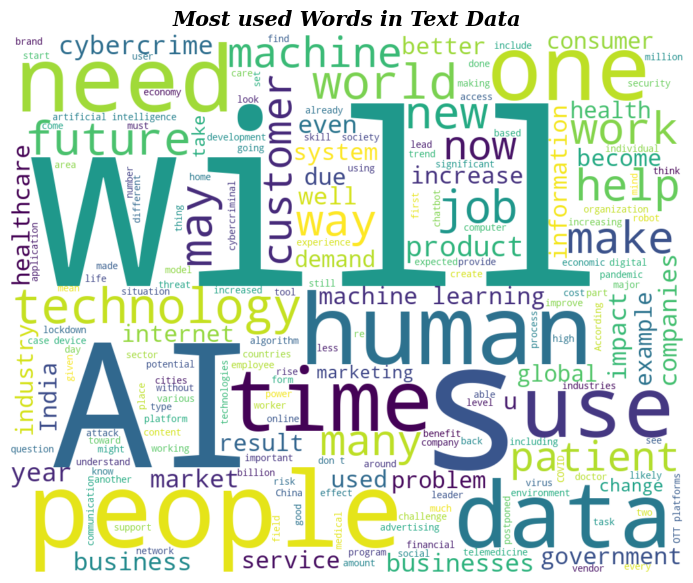

In [17]:
raw_output=' '.join(output1['Text'])
# Create word cloud
wordcloud = WordCloud(width=1000, height=800, random_state=100,background_color='white').generate(str(raw_output))

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.title('Most used Words in Text Data', family= 'serif', fontsize= 15, weight= 'bold', style ='italic')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
raw_data = output1['Text'].apply(word_tokenize)
# Join the words within the lists and count word frequencies
total_words_raw = [word.lower() for inner_list in raw_data for word in inner_list]
wordfreqdist_raw = nltk.FreqDist(total_words_raw)
mostcommon_raw = wordfreqdist_raw.most_common(100)
mostcommon_raw

[('the', 6241),
 (',', 5365),
 ('.', 5306),
 ('and', 3701),
 ('to', 3679),
 ('of', 3445),
 ('in', 2310),
 ('a', 2226),
 ('is', 1539),
 ('for', 1175),
 ('that', 1140),
 ('it', 997),
 ('be', 939),
 ('as', 922),
 ('are', 912),
 ('’', 898),
 ('will', 845),
 ('with', 812),
 ('on', 773),
 ('can', 753),
 ('this', 711),
 ('have', 637),
 ('by', 633),
 ('has', 552),
 ('or', 509),
 ('s', 506),
 ('their', 502),
 ('more', 480),
 ('from', 476),
 ('we', 452),
 ('an', 439),
 ('they', 438),
 ('not', 387),
 ('-', 368),
 ('but', 366),
 ('ai', 365),
 ('you', 350),
 ('which', 343),
 ('people', 337),
 ('data', 335),
 ('also', 330),
 ('these', 321),
 (':', 320),
 ('at', 320),
 (')', 316),
 ('(', 309),
 ('all', 264),
 ('there', 261),
 ('world', 258),
 ('our', 234),
 ('your', 233),
 ('like', 227),
 ('been', 221),
 ('was', 218),
 ('so', 217),
 ('new', 215),
 ('one', 209),
 ('if', 208),
 ('technology', 207),
 ('t', 206),
 ('”', 198),
 ('“', 197),
 ('other', 192),
 ('its', 189),
 ('what', 188),
 ('future', 187),


it can be observed that puncuations and stop words need to be removed

In [32]:
#removing http links or any other slashes
data_no_link = output1["Text"].apply(lambda x: re.sub(r'http\S+', '', x))

#applying Contractions
expanded_text = output1['Text'].apply(lambda text: contractions.fix(text))

# Splitting the text into individual words or tokens.
# tokenization
txt = expanded_text.apply(word_tokenize)
txt
# Converting all the words to lower case
# Normalizing
low_txt = txt.apply(lambda x: [word.lower() for word in x])
low_txt

0     [we, have, seen, a, huge, development, and, de...
1     [throughout, history, ,, from, the, industrial...
2     [introduction, in, the, span, of, just, a, few...
3     [the, way, we, live, ,, work, ,, and, communic...
4     [the, year, 2040, is, poised, to, witness, a, ...
                            ...                        
92    [epidemics, ,, in, general, ,, have, both, dir...
93    [covid, 19, has, bought, the, world, to, its, ...
94    [handicrafts, is, an, art, of, making, crafts,...
95    [i, would, rather, pay, cash, –, before, covid...
96    [as, business, close, to, help, prevent, trans...
Name: Text, Length: 97, dtype: object

In [33]:
result = string.punctuation
print(result)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [34]:
#Removing Punctuations

no_punc = low_txt.apply(lambda x: [word for word in x if word not in result])
no_punc

0     [we, have, seen, a, huge, development, and, de...
1     [throughout, history, from, the, industrial, r...
2     [introduction, in, the, span, of, just, a, few...
3     [the, way, we, live, work, and, communicate, h...
4     [the, year, 2040, is, poised, to, witness, a, ...
                            ...                        
92    [epidemics, in, general, have, both, direct, a...
93    [covid, 19, has, bought, the, world, to, its, ...
94    [handicrafts, is, an, art, of, making, crafts,...
95    [i, would, rather, pay, cash, –, before, covid...
96    [as, business, close, to, help, prevent, trans...
Name: Text, Length: 97, dtype: object

In [35]:
# Function to remove any other symbols from a word
def remove_symbols(word):
    return re.sub(r'[^\w\s]', '', word)
for i in range(2):

# Remove symbols and single-letter words, looping the code to run twice for clear data
    punch = no_punc.apply(lambda x: [remove_symbols(word) for word in x if len(word) > 1])
punch

0     [we, have, seen, huge, development, and, depen...
1     [throughout, history, from, the, industrial, r...
2     [introduction, in, the, span, of, just, few, d...
3     [the, way, we, live, work, and, communicate, h...
4     [the, year, 2040, is, poised, to, witness, con...
                            ...                        
92    [epidemics, in, general, have, both, direct, a...
93    [covid, 19, has, bought, the, world, to, its, ...
94    [handicrafts, is, an, art, of, making, crafts,...
95    [would, rather, pay, cash, before, covid19, wo...
96    [as, business, close, to, help, prevent, trans...
Name: Text, Length: 97, dtype: object

In [36]:
# Join the tokenized, punctuation-removed clean data
clean = punch. apply(' '.join)

# passing lambda function to remove additional space if exists between words
cleaned = clean.apply(lambda x: re.sub(' +', ' ', x))
cleaned

0     we have seen huge development and dependence o...
1     throughout history from the industrial revolut...
2     introduction in the span of just few decades t...
3     the way we live work and communicate has unque...
4     the year 2040 is poised to witness continued r...
                            ...                        
92    epidemics in general have both direct and indi...
93    covid 19 has bought the world to its knees wit...
94    handicrafts is an art of making crafts by hand...
95    would rather pay cash before covid19 would rat...
96    as business close to help prevent transmission...
Name: Text, Length: 97, dtype: object

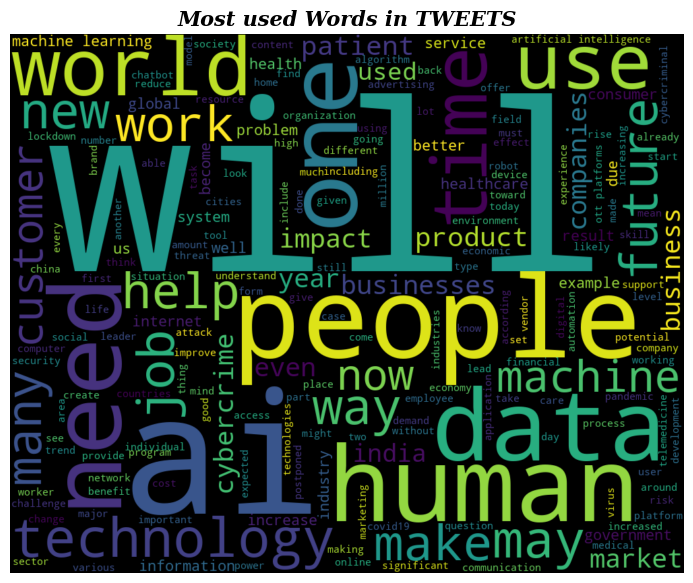

In [37]:
clean_tweets=' '.join(cleaned)
# Create word cloud
wordcloud = WordCloud(width=1000, height=800, random_state=100,background_color='black').generate(str(clean_tweets))

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.title('Most used Words in TWEETS', family= 'serif', fontsize= 15, weight= 'bold', style ='italic')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
cleaned_data = pd.DataFrame({'URL_ID':output1['URL_ID'], 'Title': output1['Title'], "Text" : cleaned})
cleaned_data.reset_index(drop=True, inplace= True)
cleaned_data

,URL_ID,Title,Text
0,blackassign0001,Rising IT cities and its impact on the economy...,we have seen huge development and dependence o...
1,blackassign0002,Rising IT Cities and Their Impact on the Econo...,throughout history from the industrial revolut...
2,blackassign0003,"Internet Demand’s Evolution, Communication Imp...",introduction in the span of just few decades t...
3,blackassign0004,Rise of Cybercrime and its Effect in upcoming ...,the way we live work and communicate has unque...
4,blackassign0005,OTT platform and its impact on the entertainme...,the year 2040 is poised to witness continued r...
...,...,...,...
92,blackassign0096,Due to the COVID-19 the repercussion of the en...,epidemics in general have both direct and indi...
93,blackassign0097,Impact of COVID-19 pandemic on office space an...,covid 19 has bought the world to its knees wit...
94,blackassign0098,Contribution of handicrafts (Visual Arts & Lit...,handicrafts is an art of making crafts by hand...
95,blackassign0099,How COVID-19 is impacting payment preferences?,would rather pay cash before covid19 would rat...


In [39]:
cleaned_data.isna().sum()

URL_ID    0
Title     0
Text      0
dtype: int64

In [40]:
cleaned_data.describe()

,URL_ID,Title,Text
count,97,97,97
unique,97,92,97
top,blackassign0001,Rise of e-health and its impact on humans by t...,we have seen huge development and dependence o...
freq,1,3,1


No duplicates found in Text data

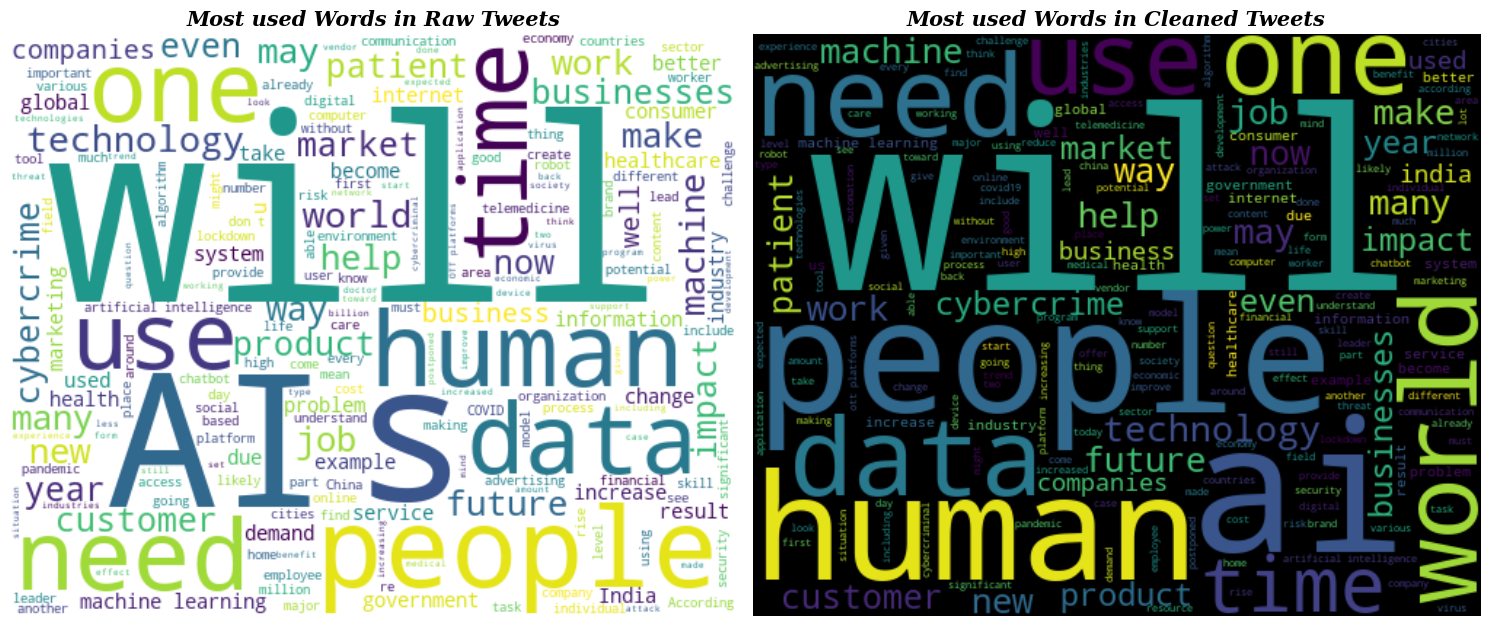

In [41]:
# Combine raw tweets and cleaned tweets into one string
raw_tweets = ' '.join(output1['Text'])
clean_tweets = ' '.join(cleaned)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Create a word cloud for raw tweets
wordcloud_raw = WordCloud(width=500, height=400, random_state=100, background_color='white').generate(raw_tweets)
axes[0].imshow(wordcloud_raw, interpolation='bilinear')
axes[0].set_title('Most used Words in Raw Tweets', family='serif', fontsize=15, weight='bold', style='italic')
axes[0].axis("off")

# Create a word cloud for cleaned tweets
wordcloud_clean = WordCloud(width=500, height=400, random_state=100, background_color='black').generate(clean_tweets)
axes[1].imshow(wordcloud_clean, interpolation='bilinear')
axes[1].set_title('Most used Words in Cleaned Tweets', family='serif', fontsize=15, weight='bold', style='italic')
axes[1].axis("off")

# Display the figure with both word clouds
plt.tight_layout()
plt.show()


In [42]:
cleaned_txt = cleaned.apply(word_tokenize)

# Join the words within the lists and count word frequencies
total_words_cleaned = [word.lower() for inner_list in cleaned_txt for word in inner_list]
wordfreqdist_cleaned = nltk.FreqDist(total_words_cleaned)
mostcommon_cleaned = wordfreqdist_cleaned.most_common(100)
mostcommon_cleaned[0:20]

[('the', 6242),
 ('and', 3701),
 ('to', 3679),
 ('of', 3445),
 ('in', 2310),
 ('is', 1681),
 ('for', 1175),
 ('that', 1141),
 ('it', 997),
 ('are', 977),
 ('be', 939),
 ('as', 922),
 ('will', 876),
 ('with', 812),
 ('on', 773),
 ('can', 753),
 ('this', 711),
 ('have', 664),
 ('by', 634),
 ('not', 592)]

Removing Stop Words

In [43]:
# Join the words within the lists and count word frequencies
stop = stopwords.words('english')
cleaned_stp_txt = cleaned_txt.apply(lambda x: [word for word in x if word not in stop])
total_words_stp = [word.lower() for inner_list in cleaned_stp_txt for word in inner_list]
wordfreqdist_stp = nltk.FreqDist(total_words_stp)
mostcommon_stp = wordfreqdist_stp.most_common(100)
mostcommon_stp

[('ai', 380),
 ('people', 337),
 ('data', 335),
 ('also', 330),
 ('world', 258),
 ('like', 228),
 ('new', 215),
 ('one', 209),
 ('technology', 207),
 ('future', 187),
 ('need', 182),
 ('may', 181),
 ('use', 175),
 ('healthcare', 174),
 ('human', 174),
 ('many', 173),
 ('learning', 172),
 ('time', 170),
 ('work', 168),
 ('help', 160),
 ('internet', 160),
 ('machine', 158),
 ('even', 157),
 ('intelligence', 157),
 ('could', 154),
 ('businesses', 152),
 ('us', 150),
 ('business', 149),
 ('companies', 148),
 ('industry', 145),
 ('marketing', 143),
 ('health', 141),
 ('would', 139),
 ('humans', 137),
 ('market', 136),
 ('information', 135),
 ('make', 132),
 ('social', 130),
 ('cybercrime', 128),
 ('india', 125),
 ('jobs', 124),
 ('impact', 123),
 ('way', 123),
 ('machines', 122),
 ('better', 120),
 ('global', 120),
 ('digital', 120),
 ('used', 120),
 ('become', 117),
 ('take', 116),
 ('demand', 112),
 ('pandemic', 112),
 ('due', 111),
 ('however', 108),
 ('artificial', 107),
 ('platforms', 

Comparing the raw data frame with the cleaned dataframe

In [44]:
comp = pd.DataFrame({"cleaned_txt":cleaned_txt,"cleaned_stp_txt":cleaned_stp_txt})
comp

,cleaned_twt,cleaned_stp_twt
0,"[we, have, seen, huge, development, and, depen...","[seen, huge, development, dependence, people, ..."
1,"[throughout, history, from, the, industrial, r...","[throughout, history, industrial, revolution, ..."
2,"[introduction, in, the, span, of, just, few, d...","[introduction, span, decades, internet, underg..."
3,"[the, way, we, live, work, and, communicate, h...","[way, live, work, communicate, unquestionably,..."
4,"[the, year, 2040, is, poised, to, witness, con...","[year, 2040, poised, witness, continued, revol..."
...,...,...
92,"[epidemics, in, general, have, both, direct, a...","[epidemics, general, direct, indirect, costs, ..."
93,"[covid, 19, has, bought, the, world, to, its, ...","[covid, 19, bought, world, knees, businesses, ..."
94,"[handicrafts, is, an, art, of, making, crafts,...","[handicrafts, art, making, crafts, hand, india..."
95,"[would, rather, pay, cash, before, covid19, wo...","[would, rather, pay, cash, covid19, would, rat..."


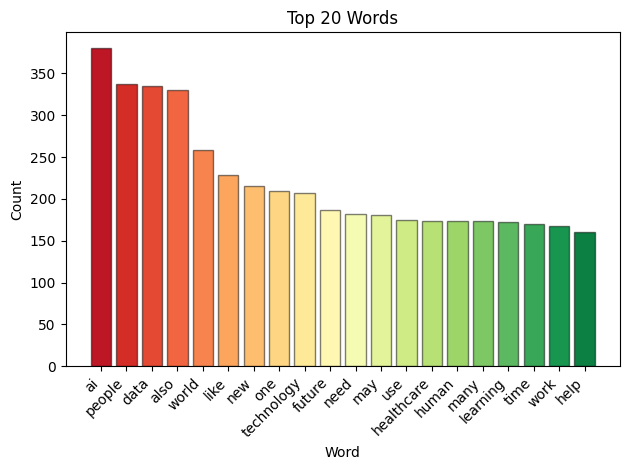

In [45]:
n_colors = 20
colors = sns.color_palette('RdYlGn', n_colors=n_colors)
top_words = [word for word, count in mostcommon_stp[:20]]
word_counts = [count for word, count in mostcommon_stp[:20]]

bars = plt.bar(top_words, word_counts, color=colors, edgecolor='k', linewidth=2)

# Adding shadow effect
for bar in bars:
    bar.set_edgecolor((0, 0, 0, 0.5))
    bar.set_linewidth(1)

plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 20 Words')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # To avoid overlapping labels
plt.show()

In [46]:
clean_very = cleaned_stp_txt. apply(' '.join)
cleaned_data_very = pd.DataFrame({'URL_ID':output1['URL_ID'], 'Title': output1['Title'], "Text" : clean_very})
cleaned_data_very.reset_index(drop=True, inplace= True)
cleaned_data_very

,URL_ID,Title,Text
0,blackassign0001,Rising IT cities and its impact on the economy...,seen huge development dependence people techno...
1,blackassign0002,Rising IT Cities and Their Impact on the Econo...,throughout history industrial revolution 18th ...
2,blackassign0003,"Internet Demand’s Evolution, Communication Imp...",introduction span decades internet undergone a...
3,blackassign0004,Rise of Cybercrime and its Effect in upcoming ...,way live work communicate unquestionably chang...
4,blackassign0005,OTT platform and its impact on the entertainme...,year 2040 poised witness continued revolution ...
...,...,...,...
92,blackassign0096,Due to the COVID-19 the repercussion of the en...,epidemics general direct indirect costs associ...
93,blackassign0097,Impact of COVID-19 pandemic on office space an...,covid 19 bought world knees businesses shut tr...
94,blackassign0098,Contribution of handicrafts (Visual Arts & Lit...,handicrafts art making crafts hand india calle...
95,blackassign0099,How COVID-19 is impacting payment preferences?,would rather pay cash covid19 would rather mak...


In [47]:
# number of words
t_df =output1['Text'].str.len().sum()
joint = ' '.join(cleaned_data['Text'])
cle = len(joint)
joint_stp = ' '.join(cleaned_data_very['Text'])
cle_stp = len(joint_stp)
cleaned_data_count = pd.DataFrame({
    'Category':['actual word count ',
                'cleaned word count',
                'after removing stop words',
                '**Total words removed**'] ,
                'Count':[t_df, cle, cle_stp, (int(t_df)- int(cle_stp))]})
cleaned_data_count.T

,0,1,2,3
Category,actual word count,cleaned word count,after removing stop words,**Total words removed**
Count,703765,682699,497712,206053


Sentiment Analyzer

In [48]:
sid = SentimentIntensityAnalyzer()
output2 = output1.copy()

1. POSITIVE SCORE and
2. NEGATIVE SCORE

In [49]:
output2['Positive_Score'] = output2['Text'].apply(lambda x: sid.polarity_scores(x)['pos'])
output2['Negative_Score'] = output2['Text'].apply(lambda x: sid.polarity_scores(x)['neg'])
output2

,URL_ID,Title,Text,Positive_Score,Negative_Score
0,blackassign0001,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,0.140,0.021
1,blackassign0002,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",0.151,0.037
2,blackassign0003,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,0.120,0.052
3,blackassign0004,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",0.104,0.147
4,blackassign0005,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,0.107,0.005
...,...,...,...,...,...
92,blackassign0096,Due to the COVID-19 the repercussion of the en...,"Epidemics, in general, have both direct and in...",0.075,0.152
93,blackassign0097,Impact of COVID-19 pandemic on office space an...,COVID 19 has bought the world to its knees. Wi...,0.099,0.097
94,blackassign0098,Contribution of handicrafts (Visual Arts & Lit...,Handicrafts is an art of making crafts by hand...,0.106,0.012
95,blackassign0099,How COVID-19 is impacting payment preferences?,I would rather pay cash – Before COVID-19.\nI ...,0.141,0.034


3. POLARITY SCORE

Positive values (greater than 0): Indicates positive sentiment.
Negative values (less than 0): Indicates negative sentiment.
Values close to 0: Suggest a more neutral sentiment.

In [50]:
output2['Polarity_Score'] = output2['Text'].apply(lambda x: sid.polarity_scores(x)['compound'])
output2.head()

,URL_ID,Title,Text,Positive_Score,Negative_Score,Polarity_Score
0,blackassign0001,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,0.140,0.021,0.9991
1,blackassign0002,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",0.151,0.037,0.9994
2,blackassign0003,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,0.120,0.052,0.9971
3,blackassign0004,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",0.104,0.147,-0.9950
4,blackassign0005,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,0.107,0.005,0.9953


4. SUBJECTIVITY SCORE

0: Indicates a highly objective or factual piece of text.
1: Indicates a highly subjective or opinionated piece of text.

In [51]:
output2['Subjectivity_Score'] = output2['Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
output2

,URL_ID,Title,Text,Positive_Score,Negative_Score,Polarity_Score,Subjectivity_Score
0,blackassign0001,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,0.140,0.021,0.9991,0.554210
1,blackassign0002,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",0.151,0.037,0.9994,0.431500
2,blackassign0003,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,0.120,0.052,0.9971,0.431038
3,blackassign0004,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",0.104,0.147,-0.9950,0.408749
4,blackassign0005,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,0.107,0.005,0.9953,0.531510
...,...,...,...,...,...,...,...
92,blackassign0096,Due to the COVID-19 the repercussion of the en...,"Epidemics, in general, have both direct and in...",0.075,0.152,-0.9986,0.391464
93,blackassign0097,Impact of COVID-19 pandemic on office space an...,COVID 19 has bought the world to its knees. Wi...,0.099,0.097,-0.3939,0.441136
94,blackassign0098,Contribution of handicrafts (Visual Arts & Lit...,Handicrafts is an art of making crafts by hand...,0.106,0.012,0.9861,0.429608
95,blackassign0099,How COVID-19 is impacting payment preferences?,I would rather pay cash – Before COVID-19.\nI ...,0.141,0.034,0.9952,0.388428


5. AVG SENTENCE LENGTH

In [52]:
output2['Sentences'] = output2['Text'].apply(sent_tokenize)
output2['Avg_Sentence_Length'] = output2['Sentences'].apply(lambda x: sum(len(word_tokenize(sentence)) for sentence in x) / len(x) if len(x) > 0 else 0)
output2 = output2.drop('Sentences', axis=1)
output2.head()

,URL_ID,Title,Text,Positive_Score,Negative_Score,Polarity_Score,Subjectivity_Score,Avg_Sentence_Length
0,blackassign0001,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,0.140,0.021,0.9991,0.554210,17.818182
1,blackassign0002,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",0.151,0.037,0.9994,0.431500,21.278481
2,blackassign0003,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,0.120,0.052,0.9971,0.431038,21.535714
3,blackassign0004,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",0.104,0.147,-0.9950,0.408749,23.568627
4,blackassign0005,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,0.107,0.005,0.9953,0.531510,19.789474


6. PERCENTAGE OF COMPLEX WORDS

Word length >= 3

In [57]:
output2['Words'] = output2['Text'].apply(word_tokenize)
output2['Complex_Words'] = output2['Words'].apply(lambda words: [word for word in words if syllables.estimate(word) >= 3])
output2['Percentage_Complex_Words'] = output2.apply(lambda row: (len(row['Complex_Words']) / len(row['Words'])) * 100 if len(row['Words']) > 0 else 0, axis=1)

# Drop the intermediate 'Words' and 'Complex_Words' columns if you don't need them
output2 = output2.drop(['Words', 'Complex_Words'], axis=1)

# Display the optimized DataFrame
output2

,URL_ID,Title,Text,Positive_Score,Negative_Score,Polarity_Score,Subjectivity_Score,Avg_Sentence_Length,Percentage_Complex_Words
0,blackassign0001,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,0.140,0.021,0.9991,0.554210,17.818182,12.900875
1,blackassign0002,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",0.151,0.037,0.9994,0.431500,21.278481,23.319453
2,blackassign0003,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,0.120,0.052,0.9971,0.431038,21.535714,31.674959
3,blackassign0004,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",0.104,0.147,-0.9950,0.408749,23.568627,29.534110
4,blackassign0005,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,0.107,0.005,0.9953,0.531510,19.789474,23.138298
...,...,...,...,...,...,...,...,...,...
92,blackassign0096,Due to the COVID-19 the repercussion of the en...,"Epidemics, in general, have both direct and in...",0.075,0.152,-0.9986,0.391464,24.100000,23.402490
93,blackassign0097,Impact of COVID-19 pandemic on office space an...,COVID 19 has bought the world to its knees. Wi...,0.099,0.097,-0.3939,0.441136,32.270270,15.075377
94,blackassign0098,Contribution of handicrafts (Visual Arts & Lit...,Handicrafts is an art of making crafts by hand...,0.106,0.012,0.9861,0.429608,21.090909,22.198276
95,blackassign0099,How COVID-19 is impacting payment preferences?,I would rather pay cash – Before COVID-19.\nI ...,0.141,0.034,0.9952,0.388428,21.281250,14.831131


7. FOG INDEX


The Gunning Fog Index is a readability formula designed to estimate the readability of a passage of text. It is particularly used to assess the difficulty of English-language texts. The formula is based on the average number of words per sentence and the percentage of complex words (words with three or more syllables).

The formula for the Gunning Fog Index is:
FogIndex=0.4×((average words per sentence)+(percentage of complex words))

In [64]:
output2['Fog_Index'] = 0.4*((output2['Avg_Sentence_Length'])+(output2['Percentage_Complex_Words']))
output2

,URL_ID,Title,Text,Positive_Score,Negative_Score,Polarity_Score,Subjectivity_Score,Avg_Sentence_Length,Percentage_Complex_Words,my wish,Fog_Index
0,blackassign0001,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,0.140,0.021,0.9991,0.554210,17.818182,12.900875,12.287623,12.287623
1,blackassign0002,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",0.151,0.037,0.9994,0.431500,21.278481,23.319453,17.839173,17.839173
2,blackassign0003,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,0.120,0.052,0.9971,0.431038,21.535714,31.674959,21.284269,21.284269
3,blackassign0004,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",0.104,0.147,-0.9950,0.408749,23.568627,29.534110,21.241095,21.241095
4,blackassign0005,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,0.107,0.005,0.9953,0.531510,19.789474,23.138298,17.171109,17.171109
...,...,...,...,...,...,...,...,...,...,...,...
92,blackassign0096,Due to the COVID-19 the repercussion of the en...,"Epidemics, in general, have both direct and in...",0.075,0.152,-0.9986,0.391464,24.100000,23.402490,19.000996,19.000996
93,blackassign0097,Impact of COVID-19 pandemic on office space an...,COVID 19 has bought the world to its knees. Wi...,0.099,0.097,-0.3939,0.441136,32.270270,15.075377,18.938259,18.938259
94,blackassign0098,Contribution of handicrafts (Visual Arts & Lit...,Handicrafts is an art of making crafts by hand...,0.106,0.012,0.9861,0.429608,21.090909,22.198276,17.315674,17.315674
95,blackassign0099,How COVID-19 is impacting payment preferences?,I would rather pay cash – Before COVID-19.\nI ...,0.141,0.034,0.9952,0.388428,21.281250,14.831131,14.444952,14.444952


8. AVG NUMBER OF WORDS PER SENTENCE

In [66]:
output2['Avg_Words_Per_Sentence'] = output2['Text'].apply(lambda text: sum(len(word_tokenize(sentence)) for sentence in sent_tokenize(text)) / len(sent_tokenize(text)) if len(sent_tokenize(text)) > 0 else 0)
output2

,URL_ID,Title,Text,Positive_Score,Negative_Score,Polarity_Score,Subjectivity_Score,Avg_Sentence_Length,Percentage_Complex_Words,Fog_Index,Avg_Words_Per_Sentence
0,blackassign0001,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,0.140,0.021,0.9991,0.554210,17.818182,12.900875,12.287623,17.818182
1,blackassign0002,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",0.151,0.037,0.9994,0.431500,21.278481,23.319453,17.839173,21.278481
2,blackassign0003,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,0.120,0.052,0.9971,0.431038,21.535714,31.674959,21.284269,21.535714
3,blackassign0004,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",0.104,0.147,-0.9950,0.408749,23.568627,29.534110,21.241095,23.568627
4,blackassign0005,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,0.107,0.005,0.9953,0.531510,19.789474,23.138298,17.171109,19.789474
...,...,...,...,...,...,...,...,...,...,...,...
92,blackassign0096,Due to the COVID-19 the repercussion of the en...,"Epidemics, in general, have both direct and in...",0.075,0.152,-0.9986,0.391464,24.100000,23.402490,19.000996,24.100000
93,blackassign0097,Impact of COVID-19 pandemic on office space an...,COVID 19 has bought the world to its knees. Wi...,0.099,0.097,-0.3939,0.441136,32.270270,15.075377,18.938259,32.270270
94,blackassign0098,Contribution of handicrafts (Visual Arts & Lit...,Handicrafts is an art of making crafts by hand...,0.106,0.012,0.9861,0.429608,21.090909,22.198276,17.315674,21.090909
95,blackassign0099,How COVID-19 is impacting payment preferences?,I would rather pay cash – Before COVID-19.\nI ...,0.141,0.034,0.9952,0.388428,21.281250,14.831131,14.444952,21.281250


9. COMPLEX WORD COUNT

In [67]:
output2['Complex_Word_Count'] = output2['Text'].apply(lambda text: sum(1 for word in word_tokenize(text) if syllables.estimate(word) >= 4))

output2

,URL_ID,Title,Text,Positive_Score,Negative_Score,Polarity_Score,Subjectivity_Score,Avg_Sentence_Length,Percentage_Complex_Words,Fog_Index,Avg_Words_Per_Sentence,Complex_Word_Count
0,blackassign0001,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,0.140,0.021,0.9991,0.554210,17.818182,12.900875,12.287623,17.818182,68
1,blackassign0002,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",0.151,0.037,0.9994,0.431500,21.278481,23.319453,17.839173,21.278481,197
2,blackassign0003,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,0.120,0.052,0.9971,0.431038,21.535714,31.674959,21.284269,21.535714,197
3,blackassign0004,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",0.104,0.147,-0.9950,0.408749,23.568627,29.534110,21.241095,23.568627,183
4,blackassign0005,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,0.107,0.005,0.9953,0.531510,19.789474,23.138298,17.171109,19.789474,69
...,...,...,...,...,...,...,...,...,...,...,...,...
92,blackassign0096,Due to the COVID-19 the repercussion of the en...,"Epidemics, in general, have both direct and in...",0.075,0.152,-0.9986,0.391464,24.100000,23.402490,19.000996,24.100000,111
93,blackassign0097,Impact of COVID-19 pandemic on office space an...,COVID 19 has bought the world to its knees. Wi...,0.099,0.097,-0.3939,0.441136,32.270270,15.075377,18.938259,32.270270,46
94,blackassign0098,Contribution of handicrafts (Visual Arts & Lit...,Handicrafts is an art of making crafts by hand...,0.106,0.012,0.9861,0.429608,21.090909,22.198276,17.315674,21.090909,23
95,blackassign0099,How COVID-19 is impacting payment preferences?,I would rather pay cash – Before COVID-19.\nI ...,0.141,0.034,0.9952,0.388428,21.281250,14.831131,14.444952,21.281250,22


10. WORD COUNT

In [68]:
# Word count of cleaned data

output2['Word_Count'] = output2['Text'].apply(lambda text: len(word_tokenize(text)))

output2

,URL_ID,Title,Text,Positive_Score,Negative_Score,Polarity_Score,Subjectivity_Score,Avg_Sentence_Length,Percentage_Complex_Words,Fog_Index,Avg_Words_Per_Sentence,Complex_Word_Count,Word_Count
0,blackassign0001,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,0.140,0.021,0.9991,0.554210,17.818182,12.900875,12.287623,17.818182,68,1372
1,blackassign0002,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",0.151,0.037,0.9994,0.431500,21.278481,23.319453,17.839173,21.278481,197,1681
2,blackassign0003,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,0.120,0.052,0.9971,0.431038,21.535714,31.674959,21.284269,21.535714,197,1206
3,blackassign0004,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",0.104,0.147,-0.9950,0.408749,23.568627,29.534110,21.241095,23.568627,183,1202
4,blackassign0005,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,0.107,0.005,0.9953,0.531510,19.789474,23.138298,17.171109,19.789474,69,752
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,blackassign0096,Due to the COVID-19 the repercussion of the en...,"Epidemics, in general, have both direct and in...",0.075,0.152,-0.9986,0.391464,24.100000,23.402490,19.000996,24.100000,111,1205
93,blackassign0097,Impact of COVID-19 pandemic on office space an...,COVID 19 has bought the world to its knees. Wi...,0.099,0.097,-0.3939,0.441136,32.270270,15.075377,18.938259,32.270270,46,1194
94,blackassign0098,Contribution of handicrafts (Visual Arts & Lit...,Handicrafts is an art of making crafts by hand...,0.106,0.012,0.9861,0.429608,21.090909,22.198276,17.315674,21.090909,23,464
95,blackassign0099,How COVID-19 is impacting payment preferences?,I would rather pay cash – Before COVID-19.\nI ...,0.141,0.034,0.9952,0.388428,21.281250,14.831131,14.444952,21.281250,22,681


11. SYLLABLE PER WORD

In [70]:
output2['Syllables_Per_Word'] = output2['Text'].apply(lambda text: sum(syllables.estimate(word) for word in word_tokenize(text)) / len(word_tokenize(text)) if len(word_tokenize(text)) > 0 else 0)

output2

,URL_ID,Title,Text,Positive_Score,Negative_Score,Polarity_Score,Subjectivity_Score,Avg_Sentence_Length,Percentage_Complex_Words,Fog_Index,Avg_Words_Per_Sentence,Complex_Word_Count,Word_Count,Syllables_Per_Word
0,blackassign0001,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,0.140,0.021,0.9991,0.554210,17.818182,12.900875,12.287623,17.818182,68,1372,1.541545
1,blackassign0002,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",0.151,0.037,0.9994,0.431500,21.278481,23.319453,17.839173,21.278481,197,1681,1.836407
2,blackassign0003,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,0.120,0.052,0.9971,0.431038,21.535714,31.674959,21.284269,21.535714,197,1206,2.065506
3,blackassign0004,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",0.104,0.147,-0.9950,0.408749,23.568627,29.534110,21.241095,23.568627,183,1202,1.969218
4,blackassign0005,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,0.107,0.005,0.9953,0.531510,19.789474,23.138298,17.171109,19.789474,69,752,1.779255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,blackassign0096,Due to the COVID-19 the repercussion of the en...,"Epidemics, in general, have both direct and in...",0.075,0.152,-0.9986,0.391464,24.100000,23.402490,19.000996,24.100000,111,1205,1.783402
93,blackassign0097,Impact of COVID-19 pandemic on office space an...,COVID 19 has bought the world to its knees. Wi...,0.099,0.097,-0.3939,0.441136,32.270270,15.075377,18.938259,32.270270,46,1194,1.543551
94,blackassign0098,Contribution of handicrafts (Visual Arts & Lit...,Handicrafts is an art of making crafts by hand...,0.106,0.012,0.9861,0.429608,21.090909,22.198276,17.315674,21.090909,23,464,1.732759
95,blackassign0099,How COVID-19 is impacting payment preferences?,I would rather pay cash – Before COVID-19.\nI ...,0.141,0.034,0.9952,0.388428,21.281250,14.831131,14.444952,21.281250,22,681,1.550661


In [81]:
nlp = spacy.load('en_core_web_sm')

12. PERSONAL PRONOUNS

In [97]:
output2['Personal_Pronoun_Count'] = output2['Text'].apply(lambda text: sum(1 for token in nlp(text.replace('\n', ' ')) if token.dep_ in ['nsubj', 'nsubjpass']))
output2

,URL_ID,Title,Text,Positive_Score,Negative_Score,Polarity_Score,Subjectivity_Score,Avg_Sentence_Length,Percentage_Complex_Words,Fog_Index,Avg_Words_Per_Sentence,Complex_Word_Count,Word_Count,Syllables_Per_Word,Personal_Pronoun_Count
0,blackassign0001,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,0.140,0.021,0.9991,0.554210,17.818182,12.900875,12.287623,17.818182,68,1372,1.541545,101
1,blackassign0002,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",0.151,0.037,0.9994,0.431500,21.278481,23.319453,17.839173,21.278481,197,1681,1.836407,118
2,blackassign0003,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,0.120,0.052,0.9971,0.431038,21.535714,31.674959,21.284269,21.535714,197,1206,2.065506,73
3,blackassign0004,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",0.104,0.147,-0.9950,0.408749,23.568627,29.534110,21.241095,23.568627,183,1202,1.969218,83
4,blackassign0005,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,0.107,0.005,0.9953,0.531510,19.789474,23.138298,17.171109,19.789474,69,752,1.779255,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,blackassign0096,Due to the COVID-19 the repercussion of the en...,"Epidemics, in general, have both direct and in...",0.075,0.152,-0.9986,0.391464,24.100000,23.402490,19.000996,24.100000,111,1205,1.783402,78
93,blackassign0097,Impact of COVID-19 pandemic on office space an...,COVID 19 has bought the world to its knees. Wi...,0.099,0.097,-0.3939,0.441136,32.270270,15.075377,18.938259,32.270270,46,1194,1.543551,93
94,blackassign0098,Contribution of handicrafts (Visual Arts & Lit...,Handicrafts is an art of making crafts by hand...,0.106,0.012,0.9861,0.429608,21.090909,22.198276,17.315674,21.090909,23,464,1.732759,27
95,blackassign0099,How COVID-19 is impacting payment preferences?,I would rather pay cash – Before COVID-19.\nI ...,0.141,0.034,0.9952,0.388428,21.281250,14.831131,14.444952,21.281250,22,681,1.550661,48


13. AVG WORD LENGTH


In [98]:
output2['Avg_Word_Length'] = output2['Text'].apply(lambda text: sum(len(word) for word in word_tokenize(text)) / len(word_tokenize(text)) if len(word_tokenize(text)) > 0 else 0)

output2

,URL_ID,Title,Text,Positive_Score,Negative_Score,Polarity_Score,Subjectivity_Score,Avg_Sentence_Length,Percentage_Complex_Words,Fog_Index,Avg_Words_Per_Sentence,Complex_Word_Count,Word_Count,Syllables_Per_Word,Personal_Pronoun_Count,Avg_Word_Length
0,blackassign0001,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,0.140,0.021,0.9991,0.554210,17.818182,12.900875,12.287623,17.818182,68,1372,1.541545,101,4.139942
1,blackassign0002,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",0.151,0.037,0.9994,0.431500,21.278481,23.319453,17.839173,21.278481,197,1681,1.836407,118,4.871505
2,blackassign0003,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,0.120,0.052,0.9971,0.431038,21.535714,31.674959,21.284269,21.535714,197,1206,2.065506,73,5.485075
3,blackassign0004,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",0.104,0.147,-0.9950,0.408749,23.568627,29.534110,21.241095,23.568627,183,1202,1.969218,83,5.312812
4,blackassign0005,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,0.107,0.005,0.9953,0.531510,19.789474,23.138298,17.171109,19.789474,69,752,1.779255,62,5.070479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,blackassign0096,Due to the COVID-19 the repercussion of the en...,"Epidemics, in general, have both direct and in...",0.075,0.152,-0.9986,0.391464,24.100000,23.402490,19.000996,24.100000,111,1205,1.783402,78,4.937759
93,blackassign0097,Impact of COVID-19 pandemic on office space an...,COVID 19 has bought the world to its knees. Wi...,0.099,0.097,-0.3939,0.441136,32.270270,15.075377,18.938259,32.270270,46,1194,1.543551,93,4.293132
94,blackassign0098,Contribution of handicrafts (Visual Arts & Lit...,Handicrafts is an art of making crafts by hand...,0.106,0.012,0.9861,0.429608,21.090909,22.198276,17.315674,21.090909,23,464,1.732759,27,4.704741
95,blackassign0099,How COVID-19 is impacting payment preferences?,I would rather pay cash – Before COVID-19.\nI ...,0.141,0.034,0.9952,0.388428,21.281250,14.831131,14.444952,21.281250,22,681,1.550661,48,4.262849


In [99]:
output2

,URL_ID,Title,Text,Positive_Score,Negative_Score,Polarity_Score,Subjectivity_Score,Avg_Sentence_Length,Percentage_Complex_Words,Fog_Index,Avg_Words_Per_Sentence,Complex_Word_Count,Word_Count,Syllables_Per_Word,Personal_Pronoun_Count,Avg_Word_Length
0,blackassign0001,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,0.140,0.021,0.9991,0.554210,17.818182,12.900875,12.287623,17.818182,68,1372,1.541545,101,4.139942
1,blackassign0002,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",0.151,0.037,0.9994,0.431500,21.278481,23.319453,17.839173,21.278481,197,1681,1.836407,118,4.871505
2,blackassign0003,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,0.120,0.052,0.9971,0.431038,21.535714,31.674959,21.284269,21.535714,197,1206,2.065506,73,5.485075
3,blackassign0004,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",0.104,0.147,-0.9950,0.408749,23.568627,29.534110,21.241095,23.568627,183,1202,1.969218,83,5.312812
4,blackassign0005,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,0.107,0.005,0.9953,0.531510,19.789474,23.138298,17.171109,19.789474,69,752,1.779255,62,5.070479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,blackassign0096,Due to the COVID-19 the repercussion of the en...,"Epidemics, in general, have both direct and in...",0.075,0.152,-0.9986,0.391464,24.100000,23.402490,19.000996,24.100000,111,1205,1.783402,78,4.937759
93,blackassign0097,Impact of COVID-19 pandemic on office space an...,COVID 19 has bought the world to its knees. Wi...,0.099,0.097,-0.3939,0.441136,32.270270,15.075377,18.938259,32.270270,46,1194,1.543551,93,4.293132
94,blackassign0098,Contribution of handicrafts (Visual Arts & Lit...,Handicrafts is an art of making crafts by hand...,0.106,0.012,0.9861,0.429608,21.090909,22.198276,17.315674,21.090909,23,464,1.732759,27,4.704741
95,blackassign0099,How COVID-19 is impacting payment preferences?,I would rather pay cash – Before COVID-19.\nI ...,0.141,0.034,0.9952,0.388428,21.281250,14.831131,14.444952,21.281250,22,681,1.550661,48,4.262849


In [100]:
df

,URL_ID,URL
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...
...,...,...
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...
97,blackassign0098,https://insights.blackcoffer.com/contribution-...
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...


In [102]:
merged_df = pd.merge(df, output2, on='URL_ID', how='left')

# Display the merged DataFrame
merged_df

,URL_ID,URL,Title,Text,Positive_Score,Negative_Score,Polarity_Score,Subjectivity_Score,Avg_Sentence_Length,Percentage_Complex_Words,Fog_Index,Avg_Words_Per_Sentence,Complex_Word_Count,Word_Count,Syllables_Per_Word,Personal_Pronoun_Count,Avg_Word_Length
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,0.140,0.021,0.9991,0.554210,17.818182,12.900875,12.287623,17.818182,68.0,1372.0,1.541545,101.0,4.139942
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",0.151,0.037,0.9994,0.431500,21.278481,23.319453,17.839173,21.278481,197.0,1681.0,1.836407,118.0,4.871505
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,0.120,0.052,0.9971,0.431038,21.535714,31.674959,21.284269,21.535714,197.0,1206.0,2.065506,73.0,5.485075
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",0.104,0.147,-0.9950,0.408749,23.568627,29.534110,21.241095,23.568627,183.0,1202.0,1.969218,83.0,5.312812
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,0.107,0.005,0.9953,0.531510,19.789474,23.138298,17.171109,19.789474,69.0,752.0,1.779255,62.0,5.070479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,"Epidemics, in general, have both direct and in...",0.075,0.152,-0.9986,0.391464,24.100000,23.402490,19.000996,24.100000,111.0,1205.0,1.783402,78.0,4.937759
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,COVID 19 has bought the world to its knees. Wi...,0.099,0.097,-0.3939,0.441136,32.270270,15.075377,18.938259,32.270270,46.0,1194.0,1.543551,93.0,4.293132
97,blackassign0098,https://insights.blackcoffer.com/contribution-...,Contribution of handicrafts (Visual Arts & Lit...,Handicrafts is an art of making crafts by hand...,0.106,0.012,0.9861,0.429608,21.090909,22.198276,17.315674,21.090909,23.0,464.0,1.732759,27.0,4.704741
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...,How COVID-19 is impacting payment preferences?,I would rather pay cash – Before COVID-19.\nI ...,0.141,0.034,0.9952,0.388428,21.281250,14.831131,14.444952,21.281250,22.0,681.0,1.550661,48.0,4.262849


In [104]:
merged_df.to_excel('merged.xlsx')